In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import collections
import glob
import os
#%pylab inline
betas=[float(i) for i in range(1,11)]
numsNNB=[300,300,25,30,30,30,20,20,20,15]
exe = "/home/uniandes/HackingLSSCode/bin/./LSS_BSK_calc "

In [75]:
def entropy(ruta,archivo, rutaSalida,beta,numNNB): #ruta es el file del catalogo. Salida es la 'extensión' para identificar i.e '.bskel_shell'
    #--Solo para un archivo de txt, un solo beta
    "Calcular BS"
    #nombre=input("Nombre del archivo: ")
    #rutaSalida = "{}/{}".format(rutaSalida, nombre + str(int(beta)))
    #rutaSalida=rutaSalida+str(int(beta))    
    path_beta="{}/Skeleton/{}.bskel{}.BSKIndex".format(ruta,rutaSalida,str(int(beta)))
    if(os.path.exists(path_beta)==False):
        comm = "{} -input {} -output {} -beta {} -printinfo false -numNNB {}".format(exe, archivo, rutaSalida+str(int(beta)),beta,numNNB)
        #print(comm)
        os.system(comm)
    "Cargar"
    
    data=np.loadtxt(path_beta)
    data=data.flatten()
    original=np.loadtxt(archivo)
    "Contar"
    contador=collections.Counter(data)
    nodos=np.array(list(contador))
    contador_repeticiones=collections.Counter(contador.values())
    "Añadir ceros"
    n_total=len(original)
    n_beta=len(nodos)
    diferencia=n_total-n_beta
    if((diferencia)>0):
        contador_repeticiones.update({0:diferencia})
    repeticiones=list(contador_repeticiones.values())
    "Probabilidades"
    probabilidad=[]
    for i in range(len(contador_repeticiones)): #Aquí yo comparaba todos los betas con el beta1 - si beta2 max de conex era 13 pero en beta1 era 20, yo sacaba la probabilidad de n<=13 - que era 0 pero quizá afectaba 
        """¡DUDA!= en el caso de abajo, n=19 no está pero n=20 sí, eso afecta en algo; es decir debería calcular esa probabilidad aunque sea 0?"""
        probabilidad.append(repeticiones[i]/n_total)
    probabilidad=np.array(probabilidad)
    #print(np.sum(probabilidad))
    #assert(np.sum(probabilidad)==1)
    entropy=-np.sum(probabilidad*np.log(probabilidad))
    return entropy

In [76]:
def grafica():
    ruta=input("Ruta de la carpeta con los archivos para calcular el skeleton: ")
    files=glob.glob(ruta+"/Original"+"/*.dat")
    #salida=ruta+"/Skeleton" ver como hacer que se guarde allá
    mean=[]
    desviaciones=[]
    for b in range(len(betas)):
        beta_files=[]
        for file in files:
            salida = file.split("/")[-1]
            beta_files.append(entropy(ruta,file,salida,betas[b],numsNNB[b]))
        mean.append(np.mean(beta_files))
        desviaciones.append(stats.pstdev(beta_files))
    plt.errorbar(betas,mean,yerr=desviaciones,fmt="o-")
    plt.savefig(ruta+"/entropy.png")
    plt.ylabel("$Entropy$")
    plt.xlabel("$\\beta$")
    return (mean,desviaciones)

Ruta de la carpeta con los archivos para calcular el skeleton: /home/uniandes/Skeleton/Data/Observaciones


([2.063018736921204,
  1.2110705215642648,
  1.226548171447159,
  1.2221339326218101,
  1.2025286626225897,
  1.1813848103526527,
  1.1598540794502052,
  1.1392779726432363,
  1.1182904153817488,
  1.0989733050951835],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

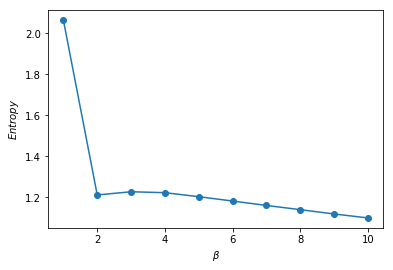

In [77]:
#path="/home/uniandes/Skeleton/Pruebas"
grafica()

Ruta de la carpeta con los archivos para calcular el skeleton: /home/uniandes/Skeleton/Data/Spheres


([2.038948033787118,
  1.1377845435627574,
  1.1915096097058628,
  1.2066749887738613,
  1.2019209873145196,
  1.1897445279885188,
  1.1737031812654035,
  1.1563951757317532,
  1.138825996237084,
  1.1215036964857563],
 [0.009996382799450736,
  0.007514459124893268,
  0.007069425450586568,
  0.006512254160578932,
  0.006148455308851882,
  0.005096497371459227,
  0.004976947544838083,
  0.0044700259906337615,
  0.004717073957131634,
  0.005104335237862008])

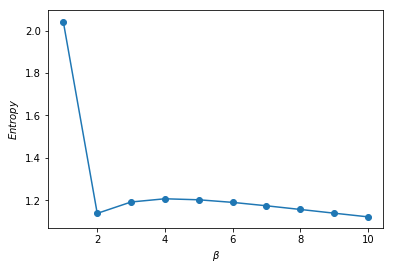

In [78]:
"/home/uniandes/Skeleton/Data/Spheres"
grafica()

Text(0.5,0,'$\\beta$')

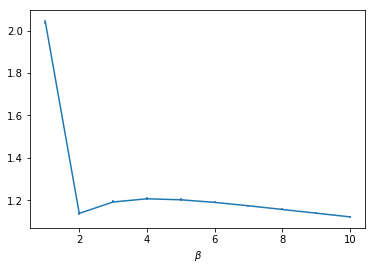

In [71]:
a=[2.038948033787118,
  1.1377845435627574,
  1.1915096097058628,
  1.2066749887738613,
  1.2019209873145196,
  1.1897445279885188,
  1.1737031812654035,
  1.1563951757317532,
  1.138825996237084,
  1.1215036964857563]
b=[0.009996382799450736,
  0.007514459124893268,
  0.007069425450586568,
  0.006512254160578932,
  0.006148455308851882,
  0.005096497371459227,
  0.004976947544838083,
  0.0044700259906337615,
  0.004717073957131634,
  0.005104335237862008]
plt.errorbar(betas,a,yerr=b,fmt="o-")
plt.ylabel("$Entropy$")
plt.xlabel("$\\beta$")

Ruta de la carpeta con los archivos para calcular el skeleton: /home/uniandes/Skeleton/Data/Shells


([1.7393218826557713,
  1.0919432366904,
  1.1626398378250637,
  1.1858055003664199,
  1.1864940022012462,
  1.1799739733828682,
  1.169857394657439,
  1.1581600198489554,
  1.1460135929406599,
  1.1336083717111576],
 [0.01710891340768194,
  0.01416091417907344,
  0.013548189428761223,
  0.01196871303271714,
  0.01149252472940336,
  0.011287650669621075,
  0.010198837961094538,
  0.009512326056429111,
  0.009493618473141136,
  0.009322770935492506])

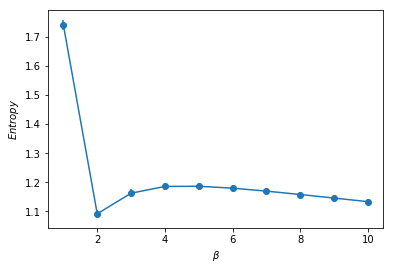

In [79]:
grafica()

Ruta de la carpeta con los archivos para calcular el skeleton: /home/uniandes/Skeleton/Data/Rockstar_halos


([1.9958102148198305,
  1.1255551299880813,
  1.1786840141673,
  1.1950522415516753,
  1.1932540864072285,
  1.184472051863135,
  1.1722575580445078,
  1.1587012760131665,
  1.144733918798713,
  1.1308930133716215],
 [0.005852233434831765,
  0.004767076221656584,
  0.00407415246235232,
  0.002630660628250135,
  0.0020357874396831686,
  0.0020171669194538246,
  0.0018585855523950531,
  0.0021544837587720938,
  0.002405447438535674,
  0.0027941227127122347])

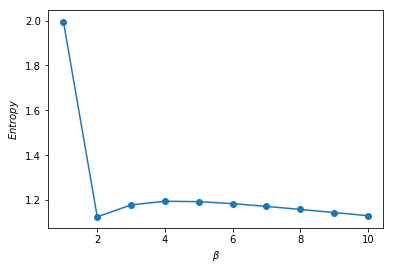

In [80]:
#/home/uniandes/Skeleton/Data/Rockstar_halos/Skeleton 6min
grafica()

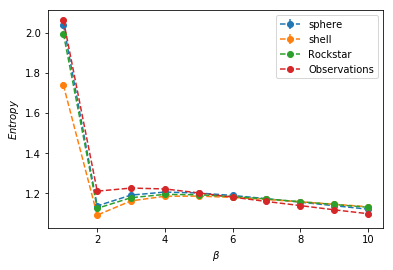

In [87]:
e_shell=[1.7393218826557713, 1.0919432366904, 1.1626398378250637, 1.1858055003664199, 1.1864940022012462, 1.1799739733828682,  1.169857394657439,  1.1581600198489554,  1.1460135929406599,1.1336083717111576]
r_shell=[0.01710891340768194,  0.01416091417907344,  0.013548189428761223, 0.01196871303271714, 0.01149252472940336, 0.011287650669621075, 0.010198837961094538, 0.009512326056429111, 0.009493618473141136, 0.009322770935492506]
e_obs=[2.063018736921204, 1.2110705215642648, 1.226548171447159, 1.2221339326218101, 1.2025286626225897, 1.1813848103526527, 1.1598540794502052, 1.1392779726432363, 1.1182904153817488, 1.0989733050951835]
e_rock=[1.9958102148198305,1.1255551299880813, 1.1786840141673, 1.1950522415516753, 1.1932540864072285, 1.184472051863135, 1.1722575580445078, 1.1587012760131665, 1.144733918798713, 1.1308930133716215],
r_rock=[0.005852233434831765, 0.004767076221656584, 0.00407415246235232, 0.002630660628250135, 0.0020357874396831686, 0.0020171669194538246, 0.0018585855523950531, 0.0021544837587720938, 0.002405447438535674, 0.0027941227127122347]
e_sphere=[2.038948033787118, 1.1377845435627574, 1.1915096097058628, 1.2066749887738613, 1.2019209873145196, 1.1897445279885188, 1.1737031812654035, 1.1563951757317532, 1.138825996237084, 1.1215036964857563]
r_sphere=[0.009996382799450736, 0.007514459124893268, 0.007069425450586568, 0.006512254160578932, 0.006148455308851882, 0.005096497371459227, 0.004976947544838083, 0.0044700259906337615, 0.004717073957131634, 0.005104335237862008]
plt.errorbar(betas,e_sphere,yerr=r_sphere,fmt="o--",label="sphere")
plt.errorbar(betas,e_shell,yerr=r_shell,fmt="o--",label="shell")
plt.errorbar(betas,e_rock,fmt="o--",label="Rockstar")
plt.errorbar(betas,e_obs,fmt="o--",label="Observations")
plt.ylabel("$Entropy$")
plt.xlabel("$\\beta$")
plt.legend()
plt.savefig("entropias")

In [84]:
np.shape(r_shell)

(10,)

In [ ]:
"""
/home/uniandes/Skeleton/Data/Spheres/Skeleton
python obs.py >comandos.sh
chmod u+x comandos.sh
./comandos.sh
"""
        

In [57]:
"""def entropy2(ruta, ruta2): #entrada es el archivo de pares que arroja el beta , ruta 2 es el archivo que meto al beta --Solo para un archivo de txt, un solo beta
    "Cargar"
    data=np.loadtxt(ruta)
    data=data.flatten()
    original=np.loadtxt(ruta2)
    "Contar"
    contador=collections.Counter(data)
    nodos=np.array(list(contador))
    contador_repeticiones=collections.Counter(contador.values())
    "Añadir ceros"
    n_total=len(original)
    n_beta=len(nodos)
    diferencia=n_total-n_beta
    if((diferencia)>0):
        contador_repeticiones.update({0:diferencia})
    repeticiones=list(contador_repeticiones.values())
    "Probabilidades"
    probabilidad=[]
    for i in range(len(contador_repeticiones)): #Aquí yo comparaba todos los betas con el beta1 - si beta2 max de conex era 13 pero en beta1 era 20, yo sacaba la probabilidad de n<=13 - que era 0 pero quizá afectaba 
        """"""¡DUDA!= en el caso de abajo, n=19 no está pero n=20 sí, eso afecta en algo; es decir debería calcular esa probabilidad aunque sea 0?
        probabilidad.append(repeticiones[i]/n_total)
    probabilidad=np.array(probabilidad)
    print(np.sum(probabilidad))
    assert(np.sum(probabilidad)==1)
    entropy=-np.sum(probabilidad*np.log(probabilidad))
    return entropy"""

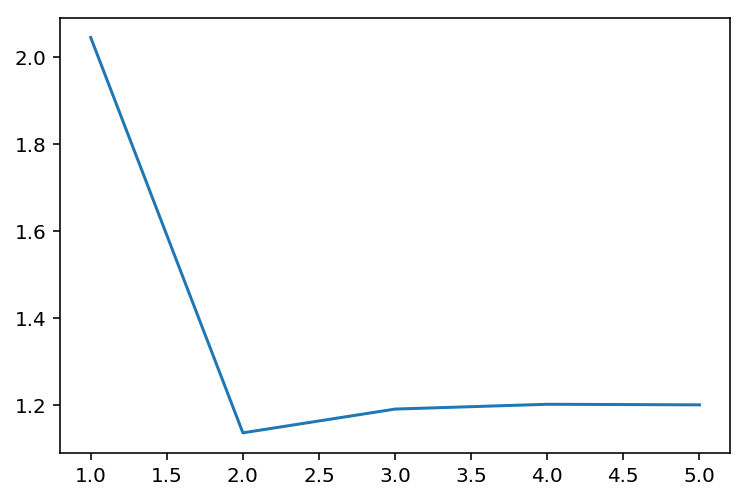

In [63]:
"""betas=[1,2,3,4,5]
plt.plot(betas,probas)"""